<a href="https://colab.research.google.com/github/Joovvhan/korean-stt/blob/master/song/how_to_google_drive_mount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다음 코드는 Google Drive를 현재 실행 중인 Google Colab 서버에 연결하는 코드입니다.
실행할 경우 링크 주소와 입력칸이 나타날텐데, 본인의 구글 계정으로 로그인하면 접속키가 나타날테니, 이를 복사하여 입력칸에 넣은 뒤 엔터를 눌러주세요. 정상적으로 연결되었다면 다다음 라인의 코드가 정상적으로 작동할 겁니다.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [15]:
import os
import numpy as np
import librosa
import scipy as sp
import matplotlib.pyplot as plt
import IPython.display as ipd

os.listdir()

['.config', 'gdrive', 'sample_data']

In [5]:
os.listdir('gdrive')

['My Drive', '.Trash']

여러분의 Google Drive에는 kss dataset이 없으므로 아래 코드는 당연히 에러가 날 겁니다. 다음과 같이 kss dataset을 본인 Google Drive에 추가하세요.

---

1. 메일을 확인하여 Google Drive 공유를 활성화하세요.
![](https://github.com/Joovvhan/korean-stt/blob/master/song/imgs/gd_step_1.PNG?raw=1)

---

2. 본인의 Google Drive 공유 문서함에서 내 드라이브에 추가를 실행하세요.
![](https://github.com/Joovvhan/korean-stt/blob/master/song/imgs/gd_step_2.PNG?raw=1)

---

3. 본인의 드라이브에 korean-single-speaker-speech-dataset이 추가 되었음을 확인하세요. 정상적으로 추가되었다면 다음 라인의 코드가 문제없이 실행될 겁니다.
![](https://github.com/Joovvhan/korean-stt/blob/master/song/imgs/gd_step_3.PNG?raw=1)

In [6]:
os.listdir('gdrive/My Drive/korean-single-speaker-speech-dataset')

['transcript.v.1.2.txt', 'kss']

In [7]:
meta_path = 'gdrive/My Drive/korean-single-speaker-speech-dataset/transcript.v.1.2.txt'
data_folder = 'gdrive/My Drive/korean-single-speaker-speech-dataset/kss'

with open(meta_path, encoding='utf-8') as f:
    metadata = np.array([line.strip().split('|') for line in f])
#     hours = sum((int(x[2]) for x in metadata)) * frame_shift_ms / (3600 * 1000)
#     log('Loaded metadata for %d examples (%.2f hours)' % (len(metadata), hours))

# metadata = metadata[:32, :2]

max_sequence_len = max(list(map(len, metadata[:, 1])))

error_jamos = [5868, 5998, 6046, 6155, 6202, 
               6654, 6890, 7486, 7502, 7744, 
               7765, 8267, 9069, 9927, 10437, 
               10515, 10533, 10606, 10610, 12777]

print(metadata.shape)
metadata = np.delete(metadata, error_jamos, axis = 0)
print(metadata.shape)

dataset_size = len(metadata)

(12853, 5)
(12833, 5)


In [0]:
wave_name_list = []

for data in metadata:
    wave_name_list.append(data[0])

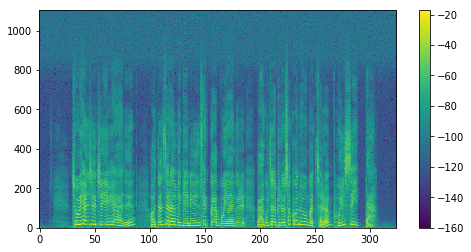

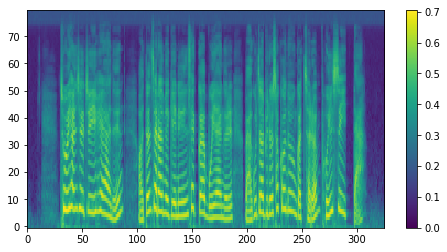

In [28]:
n_mels = 80
fs = 44100
frame_length_ms=50
frame_shift_ms=25
nsc = int(fs * frame_length_ms / 1000)
nov = nsc - int(fs * frame_shift_ms / 1000)
nhop = int(fs * frame_shift_ms / 1000)
eps = 1e-8
db_ref = 160

for i, wav_name in enumerate([wave_name_list[5031]]):
    wav_path = os.path.join(data_folder, wav_name)
    
#     npy_name = wav_name.replace('.wav', '.npy')
    
    y, sr = librosa.core.load(wav_path, sr=fs)
    
    f, t, Zxx = sp.signal.stft(y, fs=sr, nperseg=nsc, noverlap=nov)

    Sxx = np.abs(Zxx)
    Sxx = np.maximum(Sxx, eps)

    # plt.figure(figsize=(20,20))
    # plt.imshow(20*np.log10(Sxx), origin='lower')
    # plt.colorbar()
    # plt.show()

    mel_filters = librosa.filters.mel(sr=fs, n_fft=nsc, n_mels=n_mels)

    mel_specgram = np.matmul(mel_filters, Sxx)

    log_specgram = 20*np.log10(Sxx)

    norm_log_specgram = (log_specgram + db_ref) / db_ref

    log_mel_specgram = 20 * np.log10(np.maximum(mel_specgram, eps))

    norm_log_mel_specgram = (log_mel_specgram + db_ref) / db_ref
    
    plt.figure(figsize=(8, 4))
    plt.imshow(20 * np.log10(Sxx), origin='lower', aspect='auto')
    plt.colorbar()
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.imshow(norm_log_mel_specgram, origin='lower', aspect='auto')
    plt.colorbar()
    plt.show()    
    
    break

In [30]:
ipd.Audio(y, rate=fs)